In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
# Step 1: Load the dataset
df = pd.read_csv("breast-cancer (1).csv")

In [5]:
# Step 2: Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [7]:

linked = linkage(scaled_data, method='ward')

In [8]:
# Add the cluster labels to the DataFrame
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = clustering.fit_predict(scaled_data) 

In [9]:
 #cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

In [10]:
# Sample dataframe
df = pd.DataFrame({'Cluster': [0, 1, 1, 0, 1, 0, 0, 1]})

# Print cluster counts
print("Cluster Counts:")
print(df['Cluster'].value_counts())

Cluster Counts:
Cluster
0    4
1    4
Name: count, dtype: int64


In [11]:
if len(cluster_labels) == len(df):
    print("yes")  # Match
else:
    print("no")   # Mismatch

no


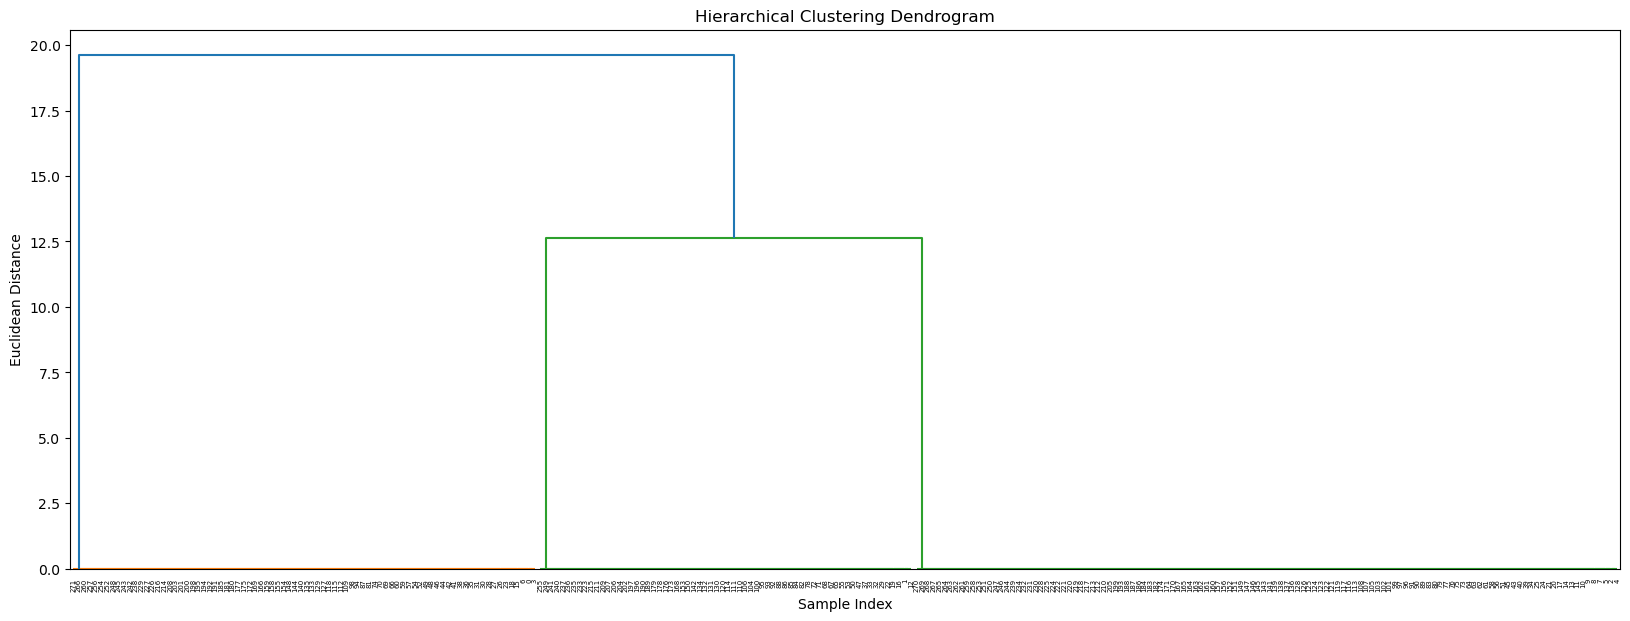

In [25]:
#Plot dendrogram
plt.figure(figsize=(20, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.show()